In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Advertising Dataset.csv")
print(df.shape)
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
df.head()

(200, 5)


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
def shuffle(df):
  d = df.sample(frac=1, axis=1)
  return d

def var(df, target):
  X = df.drop([target], axis=1)
  y = df[target]
  return X, y

def train(X, y):
  num = np.dot(X.T,y)
  den = np.dot(X.T, X)
  den_inv = np.linalg.inv(den)
  b = np.dot(den_inv,num)
  return b

def train_ridge(ld, X, y):
  den = np.dot(X.T, X)
  ident = np.identity(X.shape[1])
  #We keep the first element 0 as we won't regularise the bais term
  ident[0,0]=0
  denom = den + ident*ld 
  den_inv = np.linalg.pinv(denom)
  b = np.dot(np.dot(den_inv, X.T), y)
  return b

def predict(w, X):
  y_pred = np.dot(X, w)
  return y_pred

def mse(y_predx,y_testx):
  e = y_predx - y_testx
  se = np.dot(e.T, e)
  msee = se/(y_predx.shape[0]) 
  return msee

In [4]:
#Random Shuffling and b0 addition to feature vector
df = shuffle(df)
X, y = var(df, "sales")
b = np.ones((X.shape[0],1))
Xa = np.concatenate((b,X), axis=1)
#Splitting the data in 75:25 train test
L = int(.75*200)
X_train = np.array(Xa[0:L])
X_test = np.array(Xa[L:])
y_train = np.array(y[0:L])
y_test = np.array(y[L:])

In [5]:
w = train(X_train, y_train)
print('The value of W is', w[1:])
print('The value of interscept (b0) is', w[0])

The value of W is [-0.00140273  0.04700012  0.17993257]
The value of interscept (b0) is 3.0297667962936927


In [6]:
#RUN THIS CELL TO COMPARE THE VALUES OF W. 
#You may notice a 0 in reg.coef_[0] and it is because of the bais that we added to X. SKlearn computed intercept (b0) separetly
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("The coefficents using SK Learn Library for OLS regression is", reg.coef_[1:])
print("The value of constant or intercept is", reg.intercept_)

The coefficents using SK Learn Library for OLS regression is [-0.00140273  0.04700012  0.17993257]
The value of constant or intercept is 3.029766796293675


In [7]:
#PREDICTION ON THE TEST SET.
y_pred = predict(w, X_test)
msel = mse(y_pred, y_test)
print("The value of Mean Squared Error on the testing set is:", msel)

The value of Mean Squared Error on the testing set is: 2.667024868383714


# Ridge Regression from scratch:


*   For lambda in (0.5, 1, 5, 10, 50, 100)
*   Behaviour of parameter w and loss with lambda



In [8]:
lam = [0.5, 1, 5, 10, 50, 100]
error = []
max_coef = []
mean_coef = []
weight = []
for i in range(0, len(lam)):
  b = train_ridge(lam[i], X_train, y_train)
  weight.append(b)
  max_coef.append(max(b[1:]))
  mean_coef.append(sum(b[1:])/len(b[1:]))
  y_predr = predict(b, X_test)
  mses = mse(y_predr, y_test)
  error.append(mses)

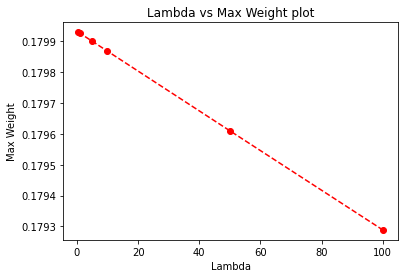

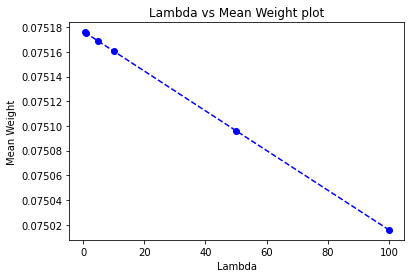

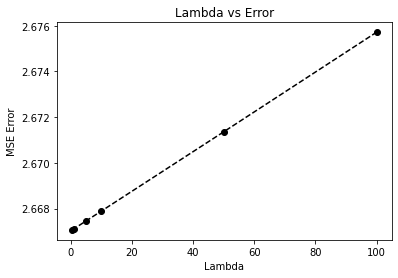

In [9]:
# Plot for Max_coef
plt.plot(lam, max_coef, linestyle='--', marker='o', c="red")
plt.title('Lambda vs Max Weight plot')
plt.xlabel('Lambda')
plt.ylabel('Max Weight')
plt.show()

plt.plot(lam, mean_coef,linestyle='--', marker='o', c="blue")
plt.title('Lambda vs Mean Weight plot')
plt.xlabel('Lambda')
plt.ylabel('Mean Weight')
plt.show()

plt.plot(lam, error, linestyle='--', marker='o', c="black")
plt.title('Lambda vs Error')
plt.xlabel('Lambda')
plt.ylabel('MSE Error')
plt.show()

# LASSO regression

*   Helps in feature selection, reduces the weights to zero because of square countours
*   SKlearn implementation



In [34]:
from sklearn.linear_model import Lasso
alp = [5,10,50,100,200]
weights = []
for i in range(len(alp)):
  lasso = Lasso(alpha=alp[i])
  lasso.fit(X_train, y_train)
  weights.append(lasso.coef_)

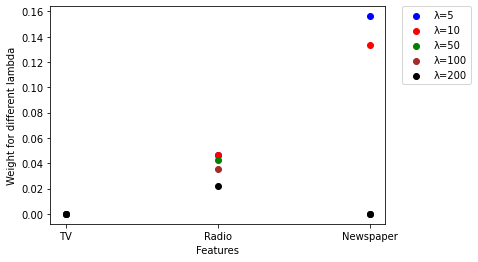

In [35]:
plt.scatter(["TV", "Radio", "Newspaper"], weights[0][1:] ,marker='o', c="blue", label="λ=5")
plt.scatter(["TV", "Radio", "Newspaper"] ,weights[1][1:], marker='o', c="red", label="λ=10")
plt.scatter(["TV", "Radio", "Newspaper"] ,weights[2][1:], marker='o' , c="green", label="λ=50")
plt.scatter(["TV", "Radio", "Newspaper"] ,weights[3][1:], marker='o', c="brown", label="λ=100")
plt.scatter(["TV", "Radio", "Newspaper"] ,weights[4][1:], marker='o', c="black", label="λ=200")
plt.xlabel('Features')
plt.ylabel('Weight for different lambda')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.show()

In [ ]:
#Hence finally for a very high lamdba only Radio has non zero feature space and rest all become zero